# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

![penguins' picture](E:\\Python\\e_visualized_data\\微信图片_20251203114828_100_571.png)

# Evaluate and clean data

## No.1 Read data

In [1]:
import pandas as pd

In [2]:
ori_data = pd.read_csv("E:\\Python\\e_visualized_data\\penguins.csv")
ori_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Evaluate data

### 1.evaluate data tidiness.etc

### 2.evaluate data cleanliness

#### Inconsistent data & data types.

In [3]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the output, there are a total of 344 observations.  
`culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, `sex ` variables have missing values, **We need to handle them later.**  

`sex`**should be 'Category'**，好处是比字符串类型更节约内存空间，也能表明说值的类型有限。

Create a copy.

In [4]:
clean_data = ori_data.copy()

Convert data type.

In [5]:
clean_data['sex'] = clean_data['sex'].astype('category')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    object  
 1   island             344 non-null    object  
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(1), float64(4), object(2)
memory usage: 16.7+ KB


#### Evaluate missing values.

由于`culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`这些变量的缺失值都差2个，so我猜测，这些缺失值来自的是同样2只penguins，接下来，我进行verify。

In [6]:
clean_data.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [7]:
clean_data.query('culmen_depth_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
clean_data.query('flipper_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
clean_data.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


From the output, 所有变量都来自index是‘3’ and ‘339’的这两只penguins。这两只penguins除了‘species’ and ‘island’这两个变量值，其余都缺失，这样的penguins have nothing to do with our explore target. so, two lines 直接delete .

In [10]:
clean_data.drop([3, 339], inplace=True)

In [11]:
clean_data.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [13]:
clean_data.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


sex缺失，但其余变量任然完整，可以为我们的探索目标提供价值。暂时不需要处理

#### 处理重复数据.etc

#### 处理不一致数据

`species`, `island`, `sex`这3个变量有可能存在不一致数据，进行验证。

In [14]:
clean_data['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [15]:
clean_data['island'].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [16]:
clean_data['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

`species`, `island`这2个变量不存在不一致数据。  
`sex`这个变量存在一个异常值：`.`  
我们将这个异常值替换为NaN

In [17]:
import numpy as np

In [18]:
clean_data['sex'] = clean_data['sex'].replace('.', np.NaN)
clean_data['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [19]:
clean_data['species'] = clean_data['species'].astype('category')
clean_data['island'] = clean_data['island'].astype('category')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


#### 处理无效/错误数据

In [20]:
clean_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


由输出结果看，不存在脱离现实意义的数据

# Explore data

设置图表颜色为彩色粉笔色pastel

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sns.set_palette('pastel')

## Penguis' species percentage.

In [23]:
# clean_data.groupby('species')['island'].count()
species_count = clean_data['species'].value_counts()
species_count

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

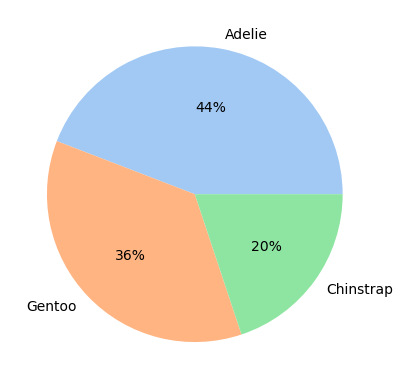

In [24]:
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

## Penguins' 岛屿分布 percentage.

In [25]:
island_count = clean_data['island'].value_counts()
island_count

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

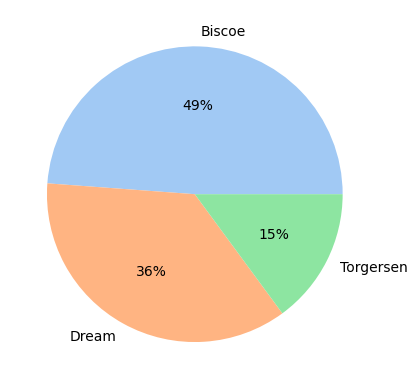

In [26]:
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

## Penguins' sex percentage.

In [27]:
sex_count = clean_data['sex'].value_counts()
sex_count

MALE      168
FEMALE    165
Name: sex, dtype: int64

样本企鹅的性别占比持平，符合随即抽样

## 不同island上，penguins的species count

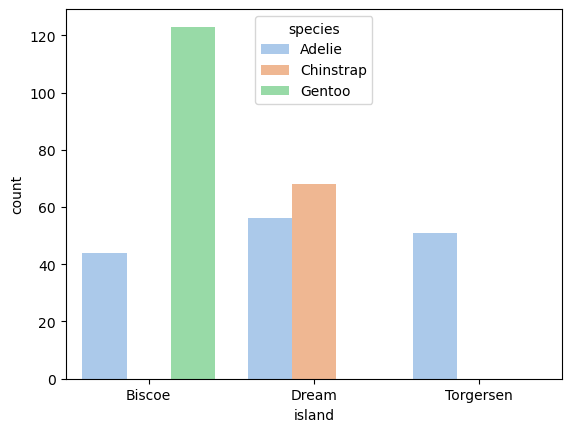

In [28]:
sns.countplot(data=clean_data, x='island', hue='species')
plt.show()

## 不同的island上，penguins' sex count.

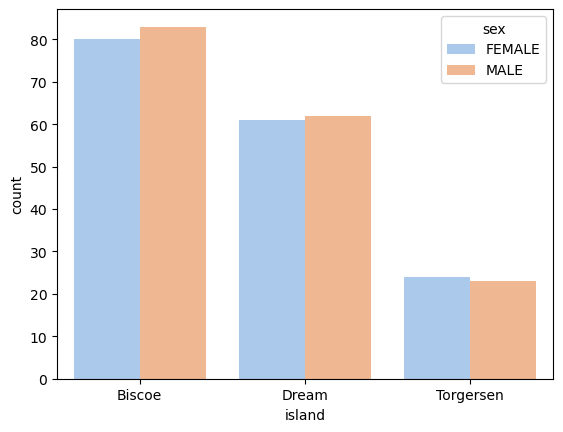

In [29]:
sns.countplot(data=clean_data, x='island', hue='sex')
plt.show()

## 查看数值之间的关系

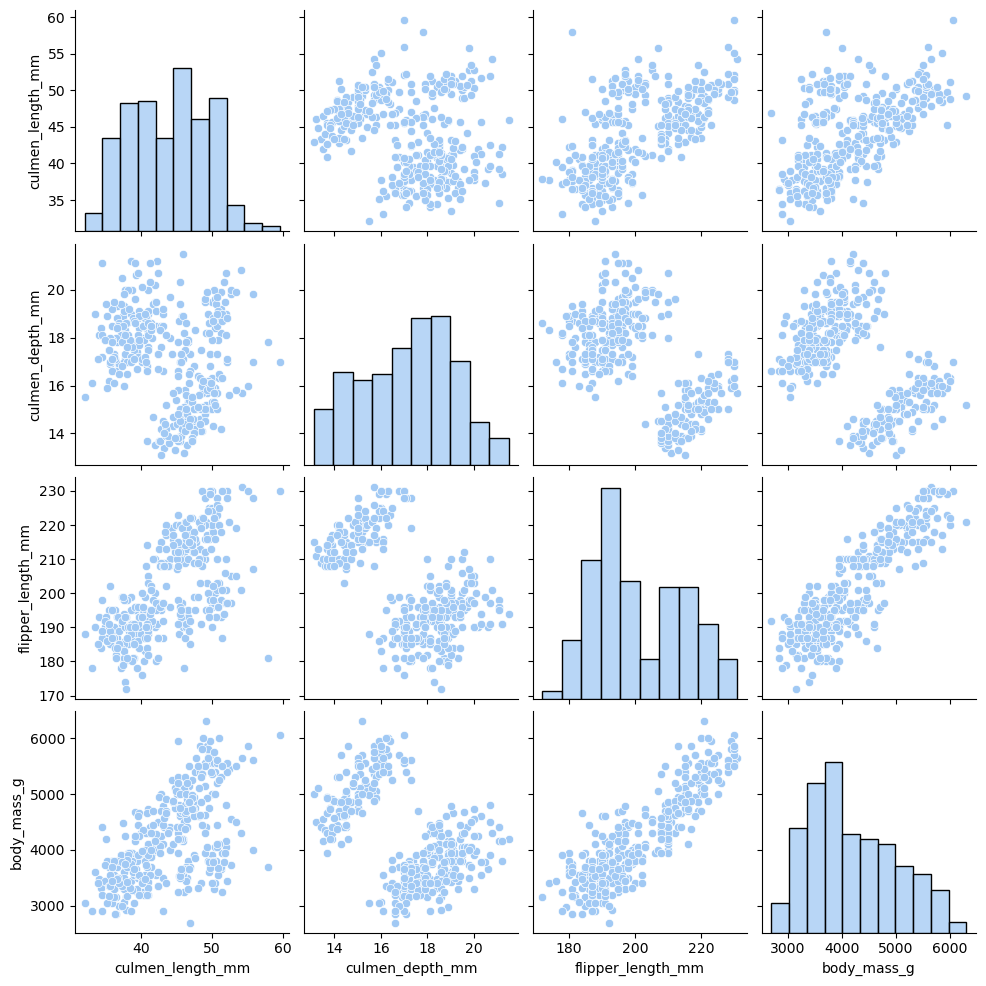

In [30]:
sns.pairplot(data=clean_data)
plt.show()

From the histgram, penguins' culmen_length, culmen_depth, flipper_length, mass都不符合正态分布，maybe 样本本身就存在差异，maybe 样本number 太少。  
From the scatter plot, 有明显的集群，根据生活常识，maybe 与penguins的species和sex有关，进行进一步分类。

## 根据species 查看数值之间的correlation

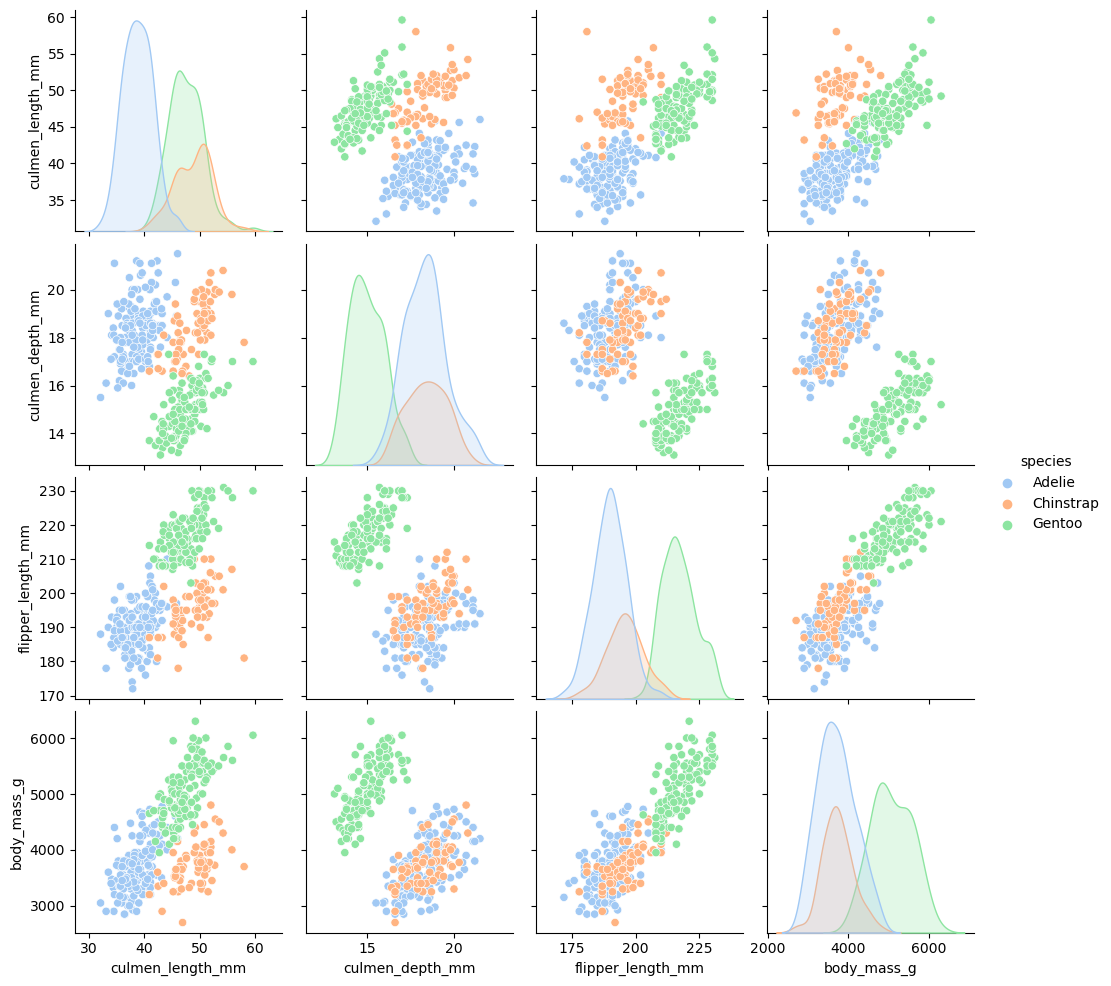

In [31]:
sns.pairplot(clean_data, hue='species')
plt.show()

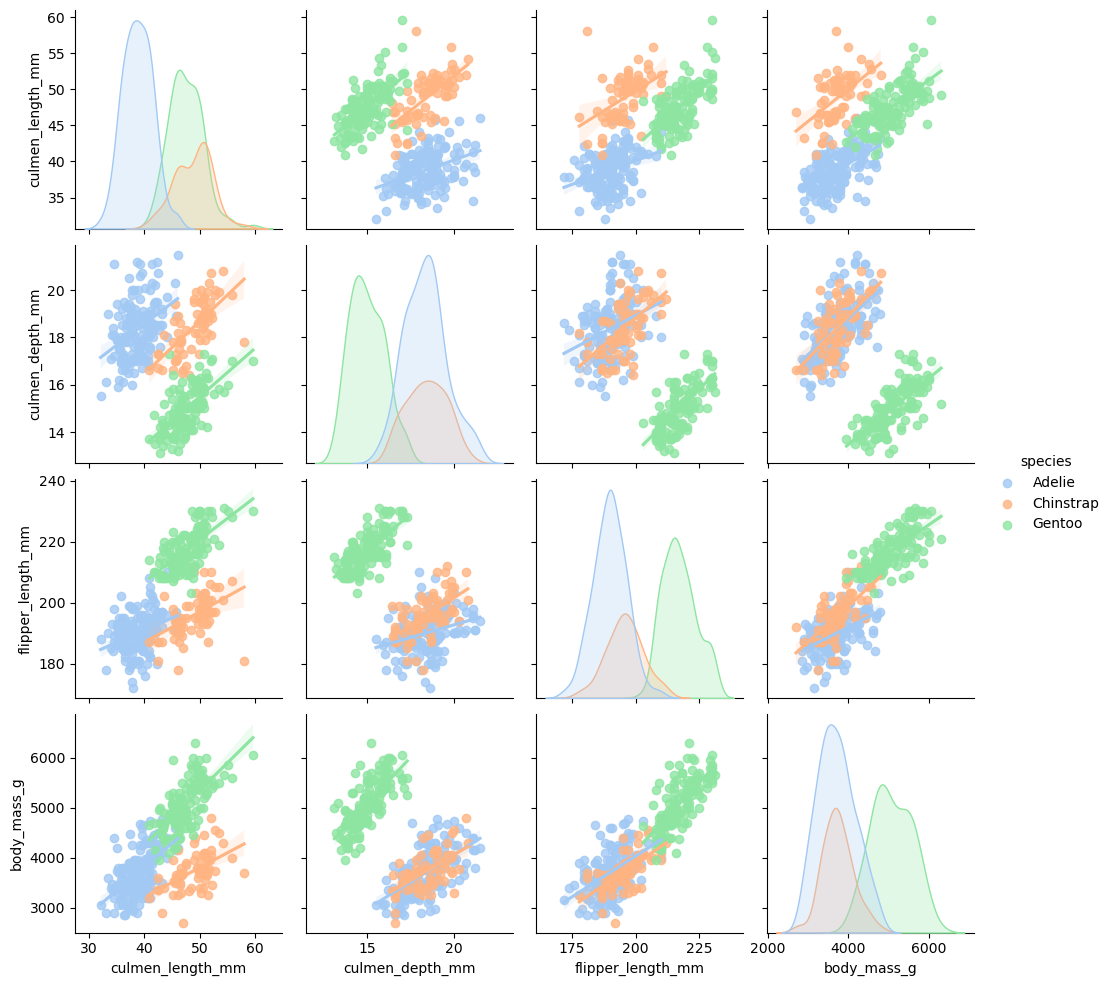

In [33]:
sns.pairplot(clean_data, hue='species', kind='reg')
plt.show()

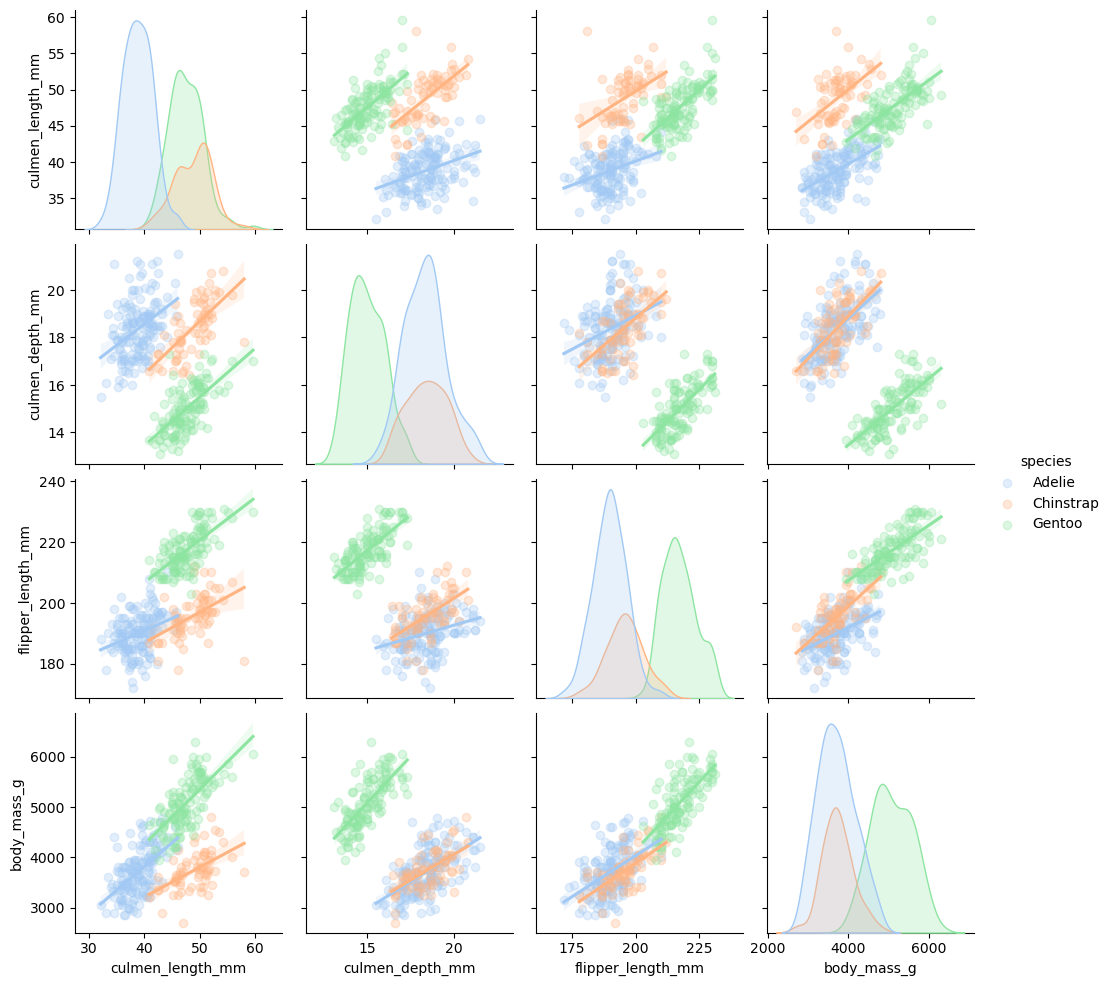

In [36]:
sns.pairplot(clean_data, hue='species', kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

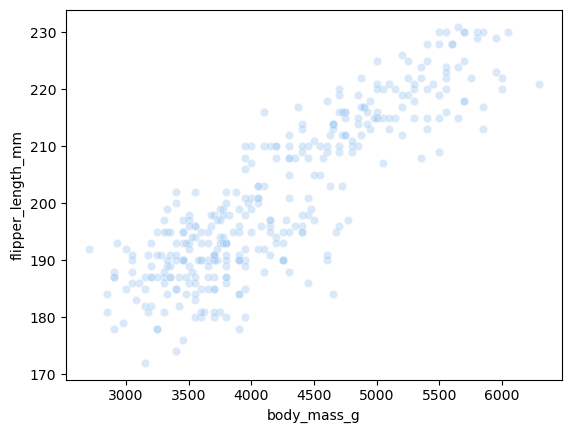

In [40]:
#传入可选参数alpha来调整点的透明度exercise，have nothing to do with analyzation.
sns.scatterplot(data=clean_data, x='body_mass_g', y='flipper_length_mm', alpha=0.4)
plt.show()

From the scatter plot and regression line, the same species penguins:属性数据之间均呈线性正比，即culmen越长，culmen越深，flipper越长，body mass越重。

From the density plot的分布，based on samples, here are are our findings：
- Chinstrap and Gentoo的culmen_length range较为接近，而Adelie的culmen_length更短。
- Adelie and Chinstrap的culmen_depth range较为接近，而Gentoo的culmen_depth更短。
- Adelie的flipper_length最短，Chinstrap中等，而Gentoo的flipper_length最长。
- Adelie and Chinstrap的body_mass range较为接近，而Gentoo的body_mass更大。

But, different species的属性数值是否存在statistically significant difference，still need to run a hypothesis test before we can draw a conclusion.

## 根据sex 查看数值之间的correlation

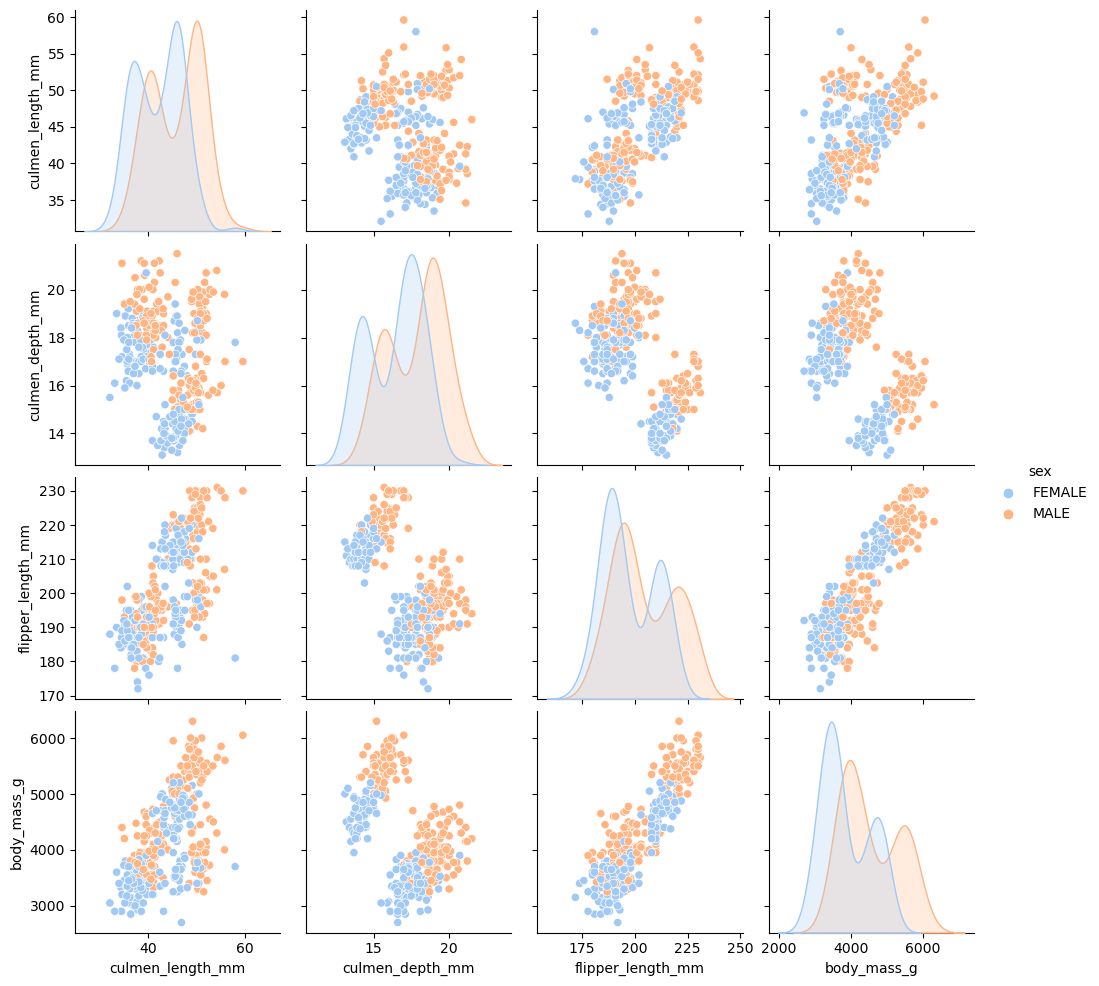

In [41]:
sns.pairplot(clean_data, hue='sex')
plt.show()

根据sex划分后可以看出，sample中male penguins在各项属性数值方面大于female peguins.